# 房价分析 HLM-GWR

In [1]:
library(lme4)
library(lmerTest)
library(GWmodel)
library(dplyr)
library(rgdal)
library(tmap)

载入需要的程辑包：Matrix


载入程辑包：‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


载入需要的程辑包：maptools

载入需要的程辑包：sp

Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()

载入需要的程辑包：robustbase


载入程辑包：‘robustbase’


The following object is masked from ‘package:lmerTest’:

    carrots


载入需要的程辑包：Rcpp

载入需要的程辑包：spatialreg

载入需要的程辑包：spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

Welcome to GWmodel version 2.2-6.


载入程辑包：‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


rgdal

## 数据预处理

In [2]:
house.price <- read.csv("house_price_coord.csv") %>%
  filter(housing_use == 1 & floor != "NONE" & lon > 114.1 & lon < 114.5)
house.price$building_type <- factor(house.price$building_type)
house.price$building_structure <- factor(house.price$building_structure)
house.price$decoration_situation <- factor(house.price$decoration_situation)
house.price$transaction_ownership <- factor(house.price$transaction_ownership)
house.price$structure_type <- factor(house.price$structure_type)
house.price$floor <- factor(house.price$floor)
house.price$price <- log(house.price$price)
house.price$charge <- log(house.price$charge)
house.price$building_area <- log(house.price$building_area)
house.price$d_busines4 <- log(house.price$d_busines4 + 1)
house.price$d_green <- log(house.price$d_green + 1)
house.price$d_waterthree <- log(house.price$d_waterthree + 1)
house.price$d_waternew <- log(house.price$d_waternew + 1)
house.price$d_waterselected <- log(house.price$d_waterselected + 1)
house.price$d_high <- log(house.price$d_high)
house.price$d_middle <- log(house.price$d_middle)
house.price$d_subwayonly <- log(house.price$d_subwayonly)
house.price$d_supermarket <- log(house.price$d_asupermarket)
house.price$d_kindergarden <- log(house.price$d_akindergarden)
house.price$d_commonmall <- log(house.price$d_acommonmall)
house.price$d_university <- log(house.price$d_auniversity)
house.price$d_primaryschool <- log(house.price$d_aprimaryschool)
house.price$d_shoppingmall <- log(house.price$d_ashoppingmall)
head(house.price)

,X,id,lon,lat,price,group,building_area,building_type,building_structure,decoration_situation,⋯,d_acommonmall,d_akindergarden,d_asupermarket,group_count,d_supermarket,d_kindergarden,d_commonmall,d_university,d_primaryschool,d_shoppingmall
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,104101066680,114.31,30.5233,9.948652,0,4.443474,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
2,1,104101127856,114.31,30.5233,9.964630,0,3.688379,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
3,2,104100890629,114.31,30.5233,9.920984,0,4.476768,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
4,3,104101117479,114.31,30.5233,9.980958,0,4.742843,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
5,4,104101202944,114.31,30.5233,9.904037,0,3.688379,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
6,5,104100740242,114.31,30.5233,10.001249,0,3.708927,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265


In [8]:
house.price.dummy <- house.price
dummy_vars = c("building_type", "building_structure", "decoration_situation", "transaction_ownership", "structure_type", "floor")
for (varn in dummy_vars) {
  value_range <- unique(house.price.dummy[,varn])
  for (value_name in value_range) {
    value_var_name <- paste(varn, value_name, sep = "")
    house.price.dummy[,value_var_name] <- 0
    house.price.dummy[which(house.price.dummy[,varn] == value_name), value_var_name] = 1
  }
}

## HLM-GWR 分析

In [5]:
### HLM
house.hlm.model <- lmer(price ~ building_area + floor高楼层 + 
                        (floor高楼层 | group), 
                       data = house.price.dummy)
performance::r2(house.hlm.model)
performance::aicc(house.hlm.model)

# R2 for Mixed Models

  Conditional R2: 0.908
     Marginal R2: 0.001

ERROR: Error: 'aicc' is not an exported object from 'namespace:performance'


In [51]:
anova(house.hlm.model)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
building_area,0.7085181101,0.7085181101,1,18902.8529,103.56521960,2.910033e-24
floor高楼层,0.0001559039,0.0001559039,1,721.6335,0.02278872,8.800500e-01


In [52]:
ranova(house.hlm.model)

,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,7,18740.49,-37466.98,NA,NA,NA
floor高楼层 in (floor高楼层 | group),5,18631.16,-37252.32,218.6577,2,3.304293e-48


In [6]:
### HLM-GWR
house.hlm.model.coef <- coef(house.hlm.model)$group
house.hlm.model.intercept <- house.hlm.model.coef$`(Intercept)`

In [11]:
house.price.hlmgwr.gwr <- group_by(house.price.dummy, group) %>%
    summarise(price = mean(price), lon = mean(lon), lat = mean(lat), 
              d_waterthree = mean(d_waterthree), charge = mean(charge), d_busines4 = mean(d_busines4), 
              d_aprimaryschool = mean(d_aprimaryschool), d_akindergarden = mean(d_akindergarden)) %>%
    as.data.frame()
house.price.hlmgwr.gwr$hlm <- house.hlm.model.intercept
coordinates(house.price.hlmgwr.gwr) <- ~ lon + lat
proj4string(house.price.hlmgwr.gwr) <- CRS("+proj=longlat +datum=WGS84")

In [12]:
### 参数设置
house.hgr.cfg <- list(
    kernel = "bisquare",
    adaptive = "adaptive"
)

In [14]:
house.hlmgwr.model.formula <- hlm ~ d_waterthree + charge + d_busines4 + d_aprimaryschool + d_akindergarden
house.hlmgwr.model.bw <- bw.gwr(house.hlmgwr.model.formula, data = house.price.hlmgwr.gwr, longlat = T, 
                                kernel = house.hgr.cfg$kernel, adaptive = house.hgr.cfg$adaptive == "adaptive")
house.hlmgwr.model <- gwr.basic(house.hlmgwr.model.formula, data = house.price.hlmgwr.gwr, bw = house.hlmgwr.model.bw, longlat = T,
                                kernel = house.hgr.cfg$kernel, adaptive = house.hgr.cfg$adaptive == "adaptive")
house.hlmgwr.model

Adaptive bandwidth: 489 CV score: 15.39101 
Adaptive bandwidth: 310 CV score: 14.20883 
Adaptive bandwidth: 199 CV score: 13.53404 
Adaptive bandwidth: 130 CV score: 12.92047 
Adaptive bandwidth: 88 CV score: 12.36721 
Adaptive bandwidth: 61 CV score: 12.11823 
Adaptive bandwidth: 45 CV score: 12.36311 
Adaptive bandwidth: 71 CV score: 12.15492 
Adaptive bandwidth: 54 CV score: 12.1062 
Adaptive bandwidth: 51 CV score: 12.18395 
Adaptive bandwidth: 57 CV score: 12.08279 
Adaptive bandwidth: 58 CV score: 12.07931 
Adaptive bandwidth: 59 CV score: 12.09066 
Adaptive bandwidth: 57 CV score: 12.08279 
Adaptive bandwidth: 58 CV score: 12.07931 


Warning message in proj4string(data):
“CRS object has comment, which is lost in output”


   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-06-09 16:28:57 
   Call:
   gwr.basic(formula = house.hlmgwr.model.formula, data = house.price.hlmgwr.gwr, 
    bw = house.hlmgwr.model.bw, kernel = house.hgr.cfg$kernel, 
    adaptive = house.hgr.cfg$adaptive == "adaptive", longlat = T)

   Dependent (y) variable:  hlm
   Independent variables:  d_waterthree charge d_busines4 d_aprimaryschool d_akindergarden
   Number of data points: 779
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
     Min       1Q   Median       3Q      Max 
-0.38378 -0.10266 -0.

In [15]:
gwr.merge.fields <- c("d_waterthree", "charge", "d_busines4", "d_aprimaryschool", "d_akindergarden")
hlm.merge.fields <- c("building_area", "floor高楼层")
coef.merge.fields <- c("Intercept", hlm.merge.fields, gwr.merge.fields)
house.model.hlmgwr.merge.coef <- cbind(
    house.hlmgwr.model$SDF@coords,
    Intercept = house.hlmgwr.model$SDF@data[,c("Intercept")],
    house.hlm.model.coef[,hlm.merge.fields], 
    house.hlmgwr.model$SDF@data[,gwr.merge.fields]
)
colnames(house.model.hlmgwr.merge.coef) <- c("lon", "lat", coef.merge.fields)
coordinates(house.model.hlmgwr.merge.coef) <- ~ lon + lat
proj4string(house.model.hlmgwr.merge.coef) <- CRS("+proj=longlat +datum=WGS84")
house.hlmgwr.coef.full <- house.model.hlmgwr.merge.coef@data
rownames(house.hlmgwr.coef.full) <- rownames(house.hlm.model.coef)

In [16]:
house.price.hlmgwr <- cbind(
    y_hat = 0,
    Intercept = 1,
    house.price.dummy[, c("price", "group", hlm.merge.fields, gwr.merge.fields)]
)
for (g in unique(house.price.hlmgwr$group)) {
    group.data <- filter(house.price.hlmgwr, group == g)[, coef.merge.fields] %>% as.matrix()
    group.beta <- house.hlmgwr.coef.full[as.character(g), coef.merge.fields] %>% as.matrix()
    house.price.hlmgwr[which(house.price.hlmgwr$group == g), "y_hat"] <- group.data %*% t(group.beta)
}
head(house.price.hlmgwr)

,y_hat,Intercept,price,group,building_area,floor高楼层,d_waterthree,charge,d_busines4,d_aprimaryschool,d_akindergarden
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10.001307,1,9.948652,0,4.443474,0,0.02355637,0.4121097,0,0.003308512,0.001446042
2,10.010158,1,9.964630,0,3.688379,1,0.02355637,0.4121097,0,0.003308512,0.001446042
3,9.990875,1,9.920984,0,4.476768,1,0.02355637,0.4121097,0,0.003308512,0.001446042
4,9.993985,1,9.980958,0,4.742843,0,0.02355637,0.4121097,0,0.003308512,0.001446042
5,10.010158,1,9.904037,0,3.688379,1,0.02355637,0.4121097,0,0.003308512,0.001446042
6,10.019274,1,10.001249,0,3.708927,0,0.02355637,0.4121097,0,0.003308512,0.001446042


In [56]:
house.hlmgwr.tv <- select(house.hlmgwr.model$SDF@data, ends_with("_TV"))
house.hlmgwr.edf <- house.hlmgwr.model$GW.diagnostic$edf
house.hlmgwr.tp <-  sapply(house.hlmgwr.tv, function (x) {
    (1 - pt(abs(x), house.hlmgwr.edf))*2
})
colnames(house.hlmgwr.tp) <- gsub("TV$", "TP", colnames(house.hlmgwr.tv))
head(house.hlmgwr.tp)

Intercept_TP,d_waterthree_TP,charge_TP,d_busines4_TP,d_aprimaryschool_TP,d_akindergarden_TP
0,0.005218307,0.0034985633,7.919509e-05,0.6733741,0.093761752
0,0.001567141,0.6726184276,1.889791e-01,0.3800311,0.005781197
0,0.965942390,0.0044106557,8.689942e-01,0.7513949,0.211590450
0,0.451376485,0.1618171257,9.900765e-01,0.5107561,0.527286890
0,0.179209561,0.0008765743,1.080130e-05,0.2125205,0.098372835
0,0.566580790,0.1955940407,9.789471e-01,0.4559557,0.602877045


In [17]:
house.price.hlmgwr$residual <- house.price.hlmgwr$price - house.price.hlmgwr$y_hat
house.price.hlmgwr.r2 <- 1 - sum(house.price.hlmgwr$residual^2) / sum((house.price.hlmgwr$price - mean(house.price.hlmgwr$price))^2)
house.price.hlmgwr.r2

[1] 0.8121152

## 制图

In [18]:
### 导入底图
wuhan <- readOGR("Map/WuhanDistinct.shp")

OGR data source with driver: ESRI Shapefile 
Source: "/home/hpdell/文档/House-HLM-GWR/Map/WuhanDistinct.shp", layer: "WuhanDistinct"
with 13 features
It has 6 fields
Integer64 fields read as strings:  FID_市界 FID_Wuhan 


### 回归系数

In [57]:
### 生成制图数据
house.price.draw <- cbind(house.model.hlmgwr.merge.coef, house.hlmgwr.tp)
names(house.price.draw@data) <- c("Intercept", "BuildingArea", "Floor.High", "d.Water", 
                                  "Fee", "d.Commercial", "d.PrimarySchool", "d.Kindergarten",
                                  "Intercept_TP", "d.Water_TP", "Fee_TP", 
                                  "d.Commercial_TP", "d.PrimarySchool_TP", "d.Kindergarten_TP")
head(house.price.draw)

,Intercept,BuildingArea,Floor.High,d.Water,Fee,d.Commercial,d.PrimarySchool,d.Kindergarten,Intercept_TP,d.Water_TP,Fee_TP,d.Commercial_TP,d.PrimarySchool_TP,d.Kindergarten_TP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9.794400,-0.02445893,-0.009618413,12.3592578,0.09955610,25.36662401,7.262657,-28.080409,0,0.005218307,0.0034985633,7.919509e-05,0.6733741,0.093761752
2,9.384429,-0.02445893,-0.027184974,20.8867742,0.02599983,11.10290242,-3.629427,-35.859550,0,0.001567141,0.6726184276,1.889791e-01,0.3800311,0.005781197
3,9.965159,-0.02445893,-0.021176674,-0.1303886,0.10349836,-0.57162594,-1.990936,-5.692436,0,0.965942390,0.0044106557,8.689942e-01,0.7513949,0.211590450
4,9.579532,-0.02445893,-0.027440407,4.0422026,0.07199685,0.06481029,-1.946101,-5.483184,0,0.451376485,0.1618171257,9.900765e-01,0.5107561,0.527286890
5,10.198045,-0.02445893,0.038644282,-4.7414626,0.09686678,55.66601913,18.972668,-24.654003,0,0.179209561,0.0008765743,1.080130e-05,0.2125205,0.098372835
6,9.584502,-0.02445893,-0.010911086,3.2738925,0.06864146,0.13451635,-2.312163,-4.587966,0,0.566580790,0.1955940407,9.789471e-01,0.4559557,0.602877045


In [58]:
select(house.price.draw@data, ends_with("_TP")) %>% sapply(function (x) {
    length(x[x > 0.05])
})

Intercept_TP         d.Water_TP             Fee_TP    d.Commercial_TP 
                 0                533                162                561 
d.PrimarySchool_TP  d.Kindergarten_TP 
               659                715

In [68]:
### 基本图层
house.figure.base <- tm_layout(legend.outside = F, legend.position = c(0, 0), legend.frame = "white", outer.margins = 0, frame = FALSE) +
    tm_shape(wuhan, bbox = house.price.draw@bbox, is.master = T) + tm_borders("black", lwd = 1) +
    tm_compass(position = c(0, 1), just = c(0, 1)) +
    tm_scale_bar(position = c(1, 0), just = c(1, 0))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


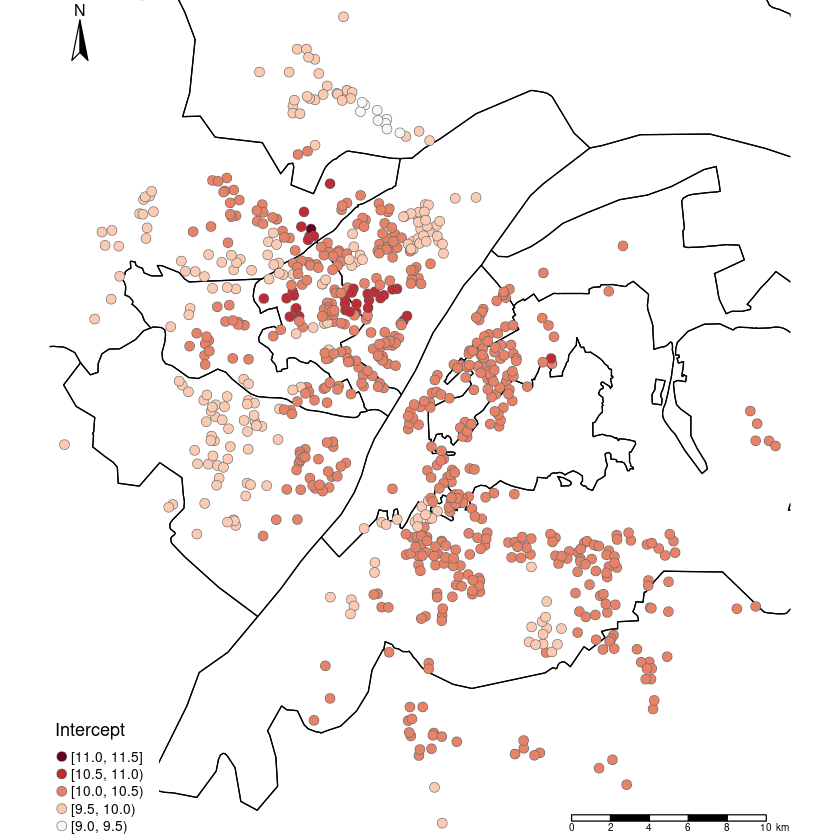

In [59]:
house.figure.Intercept <- house.figure.base + 
    tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Intercept", size = 0.3, palette = "-RdBu", n = 5, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = with(house.price.draw@data, c(min(Intercept), seq(0.1, 0.3, by = 0.05), max(Intercept)))) 
house.figure.Intercept

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


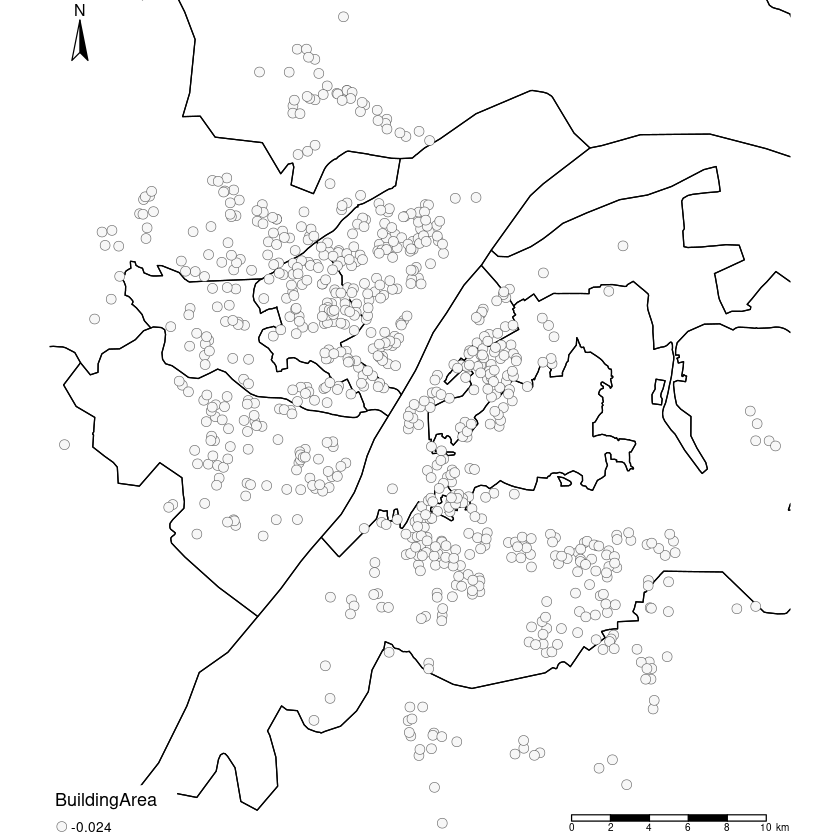

In [62]:
house.figure.BuildingArea <- house.figure.base + 
    tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "BuildingArea", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = with(house.price.draw@data, c(min(BuildingArea), seq(-0.3, 0.3, by = 0.15), max(BuildingArea))))
house.figure.BuildingArea

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


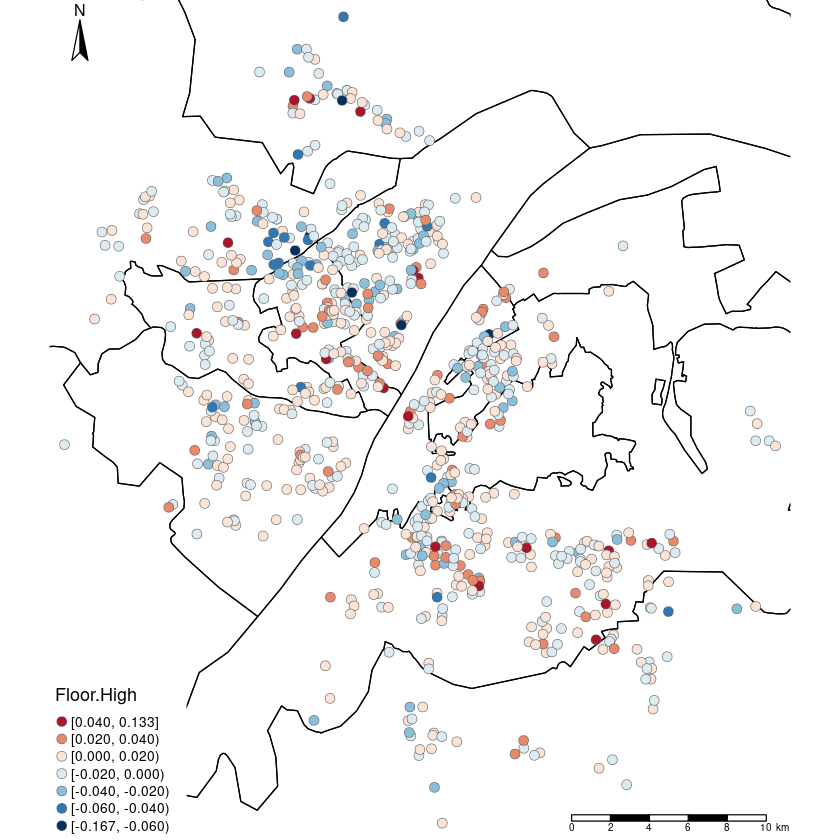

In [64]:
house.figure.Floor.High <- house.figure.base + 
    tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Floor.High", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Floor.High), seq(-0.06, 0.04, by = 0.02), max(Floor.High))))
house.figure.Floor.High

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


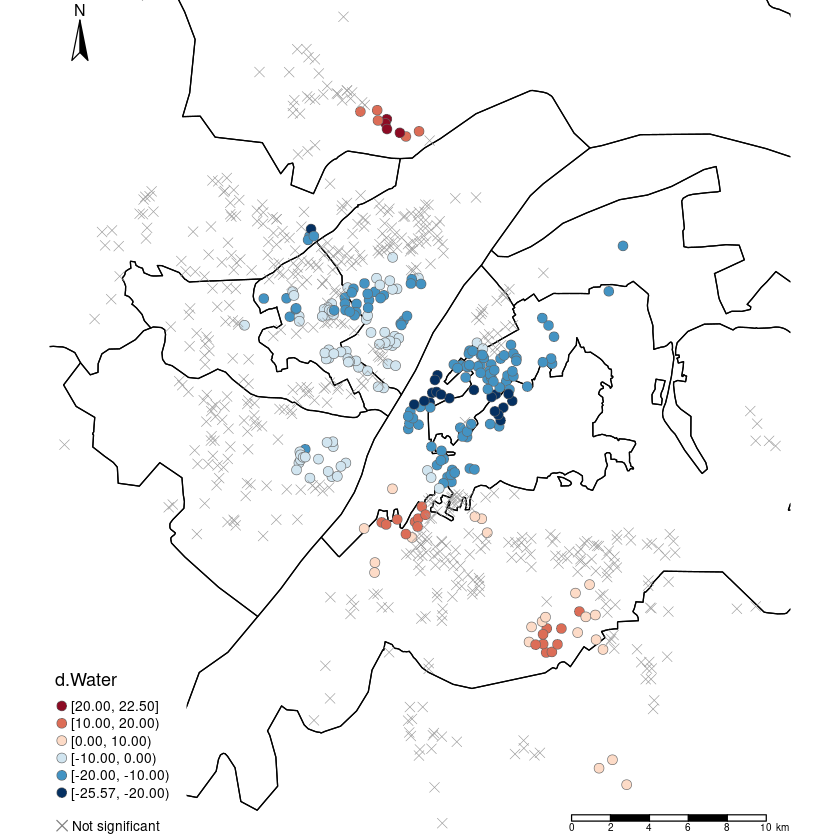

In [69]:
house.figure.d.Water <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.Water_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.Water", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Water), seq(-20, 20, by = 10), max(d.Water)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.Water_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = house.breaks.BuildingArea) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.Water

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


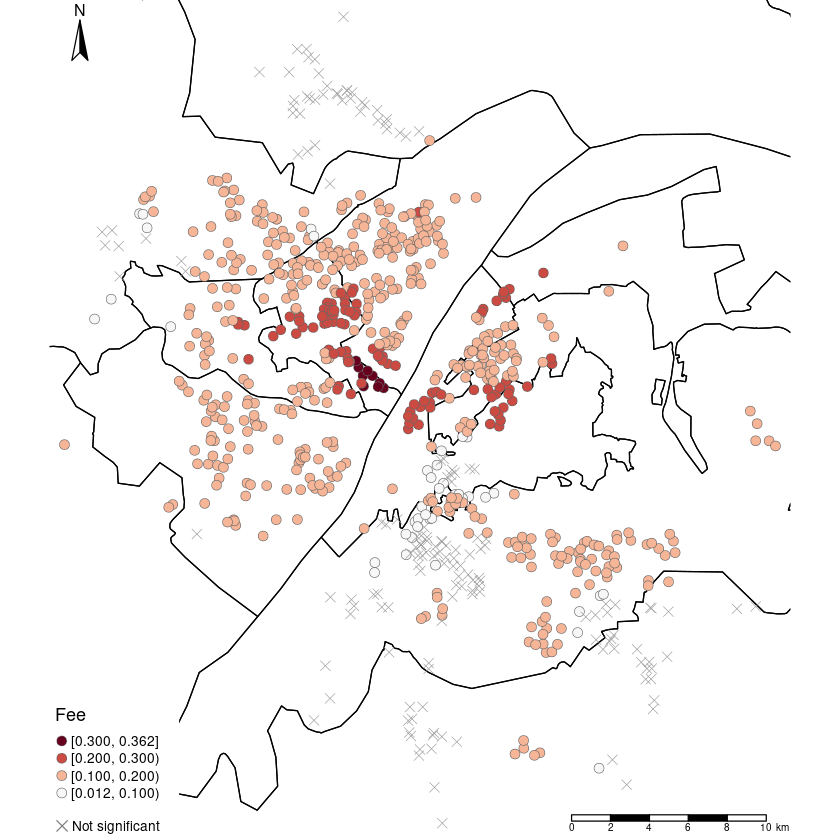

In [70]:
house.figure.Fee <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$Fee_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "Fee", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Fee), seq(0.1, 0.3, by = 0.1), max(Fee)))) +
    tm_shape(house.price.draw[house.price.draw@data$Fee_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = house.breaks.BuildingArea) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.Fee

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


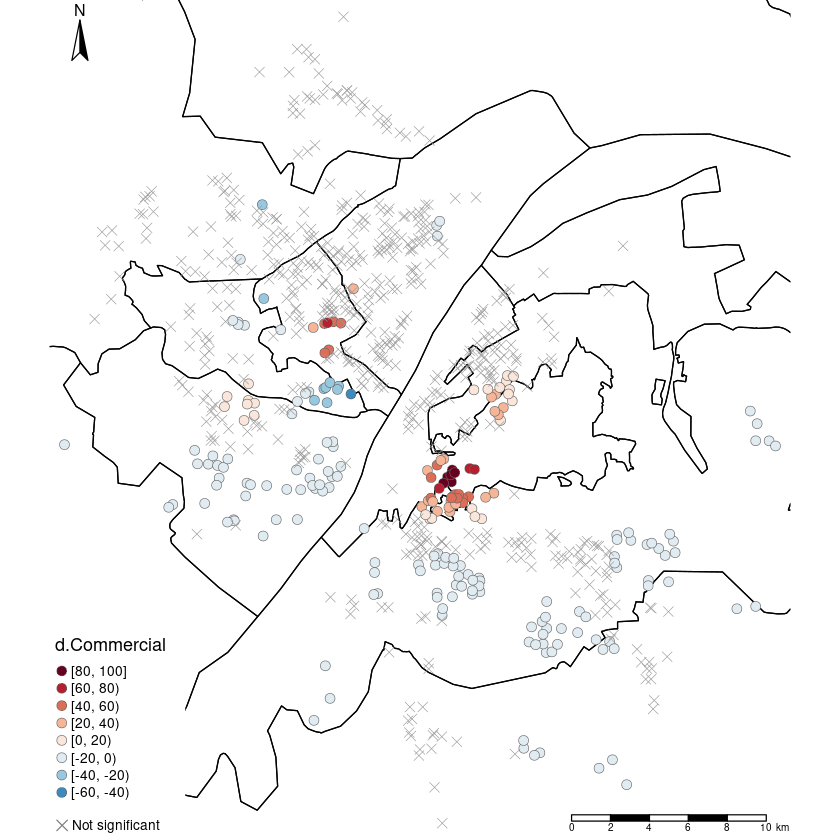

In [71]:
house.figure.d.Commercial <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.Commercial_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.Commercial", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"), 
               style = "pretty", breaks = with(house.price.draw@data, c(min(d.Commercial), seq(-40, 80, by = 20), max(d.Commercial)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.Commercial_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = house.breaks.BuildingArea) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.Commercial

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


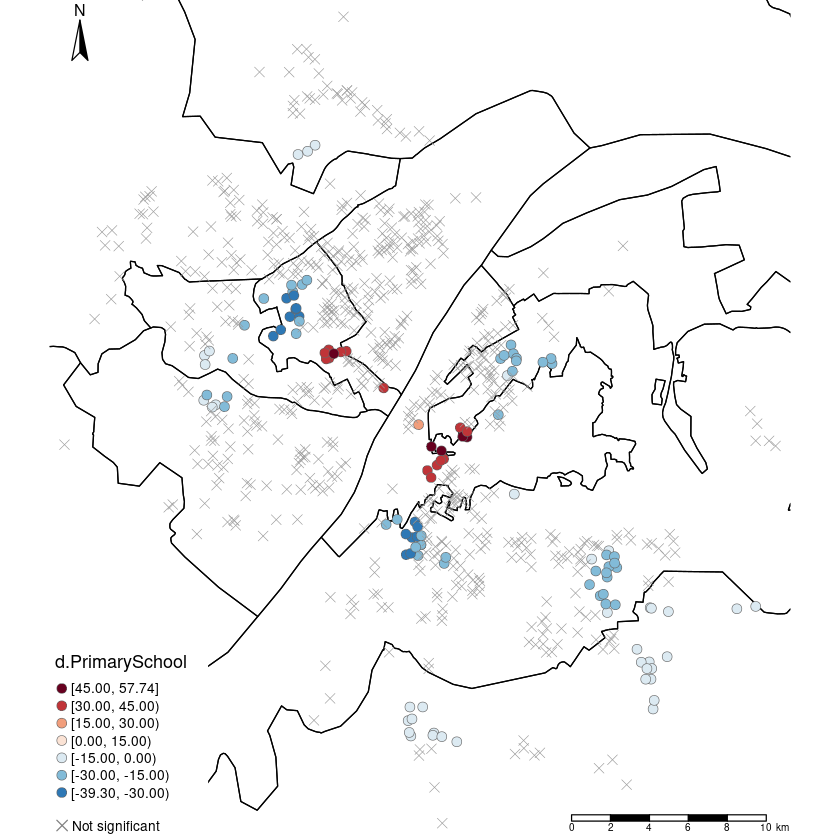

In [73]:
house.figure.d.PrimarySchool <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.PrimarySchool_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.PrimarySchool", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.PrimarySchool), seq(-30, 45, by = 15), max(d.PrimarySchool)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.PrimarySchool_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = house.breaks.BuildingArea) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.PrimarySchool

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


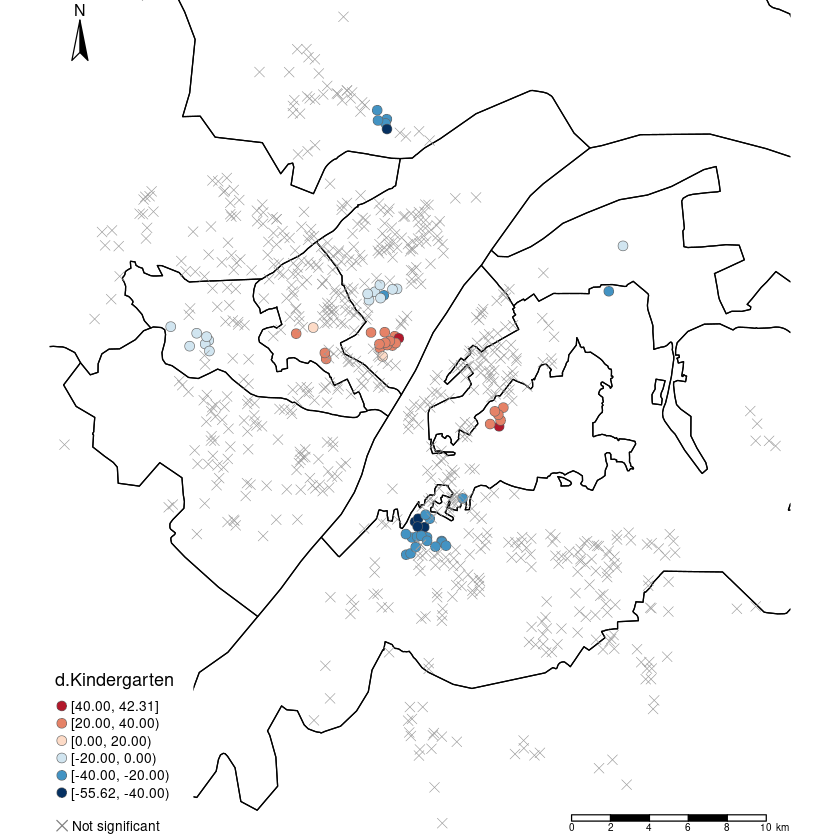

In [75]:
house.figure.d.Kindergarten <- house.figure.base + 
    tm_shape(house.price.draw[house.price.draw@data$d.Kindergarten_TP <= 0.05,], is.master = T) + 
    tm_symbols(col = "d.Kindergarten", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Kindergarten), seq(-40, 40, by = 20), max(d.Kindergarten)))) +
    tm_shape(house.price.draw[house.price.draw@data$d.Kindergarten_TP > 0.05,], is.master = T) + 
    tm_symbols(shape = 4, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "pretty", breaks = house.breaks.BuildingArea) +
    tm_add_legend(type = "symbol", shape = 4, labels = c("Not significant"))
house.figure.d.Kindergarten

In [78]:
figure.coef.map <- list(
    "Intercept" = house.figure.Intercept,
    "BuildingArea" = house.figure.BuildingArea,
    "d.Water" = house.figure.d.Water,
    "Fee" = house.figure.Fee,
    "d.Commercial" = house.figure.d.Commercial,
    "d.PrimarySchool" = house.figure.d.PrimarySchool,
    "d.Kindergarten" = house.figure.d.Kindergarten,
    "Floor.High" = house.figure.Floor.High
)

In [79]:
figure.coef.names <- c("Intercept", "d.Water", "Fee", "d.Commercial", "d.PrimarySchool", 
                       "d.Kindergarten", "BuildingArea", "Floor.High")
for (figure.coef.current in figure.coef.names) {
    print(figure.coef.current)
    tmap_save(figure.coef.map[[figure.coef.current]], 
              sprintf("Figure/HLMGWR/HGR-coef-%s-%s-%s.png", house.hgr.cfg$kernel, house.hgr.cfg$adaptive, figure.coef.current), 
              width = 6, height = 6.2, family = "serif")
}

[1] "Intercept"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-Intercept.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.Water"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-d.Water.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "Fee"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-Fee.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.Commercial"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-d.Commercial.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.PrimarySchool"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-d.PrimarySchool.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "d.Kindergarten"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-d.Kindergarten.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "BuildingArea"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-BuildingArea.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)



[1] "Floor.High"


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”
Map saved to /home/hpdell/文档/House-HLM-GWR/Figure/HLMGWR/HGR-coef-bisquare-adaptive-Floor.High.png

Resolution: 1800 by 1860 pixels

Size: 6 by 6.2 inches (300 dpi)

